In [1]:
#Instalación silenciosa del paquete missingno
%%capture
#los signos %% evita que se muestre output
!pip install missingno #el signo ! indica que es un comando


##Indicamos el orden correcto y bloque de importes (EDA)
1. Librerías base (Pandas y Numpy)
2. Visualización (Matplotlib, Seaborn y Missingno)
3. Utilidades específicas (configuracion: sns.set, estilo whitegrid y plt.rcPaams para el tamaño)
4. ML sklearn y Optuna (más adelante, no en EDA puro)
  Buena práctica:
  - EDA → sin sklearn
  - Preprocessing / Modeling → sklearn
  - Tuning → Optuna
  Más adelante, en otro notebook o sección: los importaremos, ya que Optna no entra en el Sprint 1 - EDA

*Python*
####*from sklearn.model_selection import train_test_split*
####*from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score*



In [3]:
#Librerías ensenciales
import pandas as pd # Para manejo de datos
import numpy as np # Para operaciones numéricas
import seaborn as sns # Para gráficos estadísticos
import missingno as msno # Para visualizar datos faltantes
import matplotlib.pyplot as plt # Creación de gráficos
sns.set(style="whitegrid") #utilidades especificas para visualización
plt.rcParams["figure.figsize"] = (10, 6) #utilidades especificas para visualización


In [6]:
#Procedemos a cargar el dataset y visualizarlo
train=pd.read_csv("train.csv")

#visualización del dataset
train.head() #muestra las primeras filas
train.info() #ver los datatypes, valores faltantes
train.describe() #stats de columnas numéricas

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188533 entries, 0 to 188532
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            188533 non-null  int64 
 1   brand         188533 non-null  object
 2   model         188533 non-null  object
 3   model_year    188533 non-null  int64 
 4   milage        188533 non-null  int64 
 5   fuel_type     183450 non-null  object
 6   engine        188533 non-null  object
 7   transmission  188533 non-null  object
 8   ext_col       188533 non-null  object
 9   int_col       188533 non-null  object
 10  accident      186081 non-null  object
 11  clean_title   167114 non-null  object
 12  price         188533 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 18.7+ MB


,id,model_year,milage,price
count,188533.000000,188533.000000,188533.000000,1.885330e+05
mean,94266.000000,2015.829998,65705.295174,4.387802e+04
std,54424.933488,5.660967,49798.158076,7.881952e+04
min,0.000000,1974.000000,100.000000,2.000000e+03
25%,47133.000000,2013.000000,24115.000000,1.700000e+04
50%,94266.000000,2017.000000,57785.000000,3.082500e+04
75%,141399.000000,2020.000000,95400.000000,4.990000e+04
max,188532.000000,2024.000000,405000.000000,2.954083e+06


##1. Procedemos con las 5 visualizaciones:


1. Target distribution plot
2. Price vs mileage scatter
3. Price vs model year scatter
4. Categorical vs price boxplots
5. Correlation heatmap




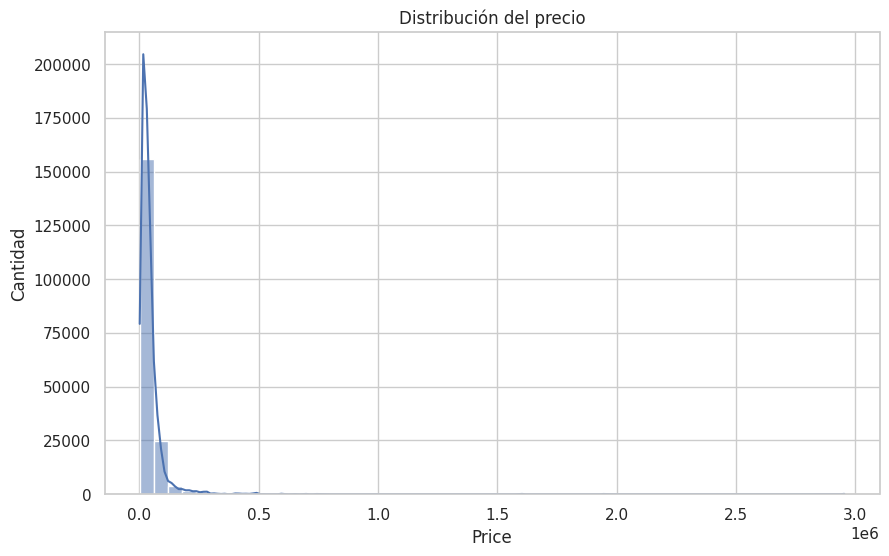

In [8]:
#1. Target distribution plot
#Aquí Queremos ver cómo se distribuye la variable objetivo price
plt.figure(figsize=(10,6))
sns.histplot(train['price'], bins=50, kde=True)
plt.title("Distribución del precio")
plt.xlabel("Price")
plt.ylabel("Cantidad")
plt.show()
#esto nos da un panorama de la distribución de price: si es simétrica, sesgada, con outliers, etc.

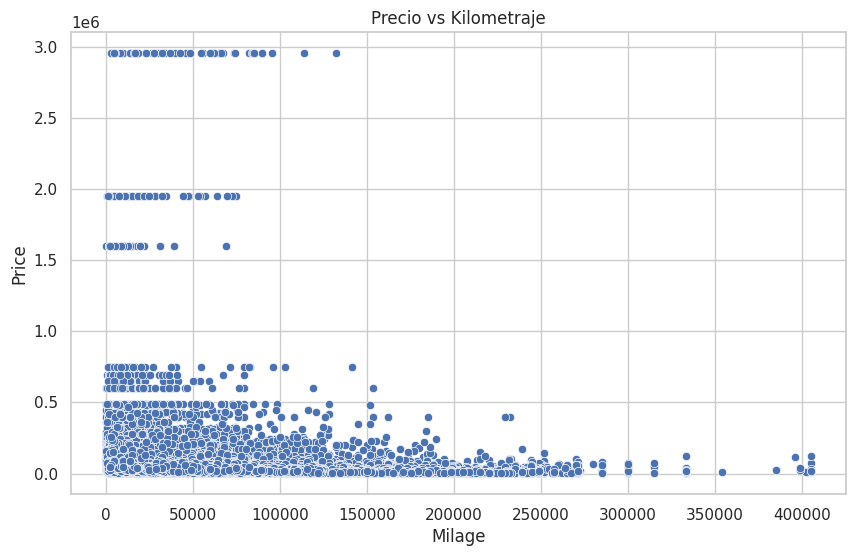

In [11]:
# 2. Price vs Mileage Scatter
#relacionamos price con milage para ver si hay tendencia
plt.figure(figsize=(10,6))
sns.scatterplot(x='milage', y='price', data=train)
plt.title("Precio vs Kilometraje")
plt.xlabel("Milage")
plt.ylabel("Price")
plt.show()
#Aqui observamos si los precios tienden a bajar cuando aumenta el kilometraje

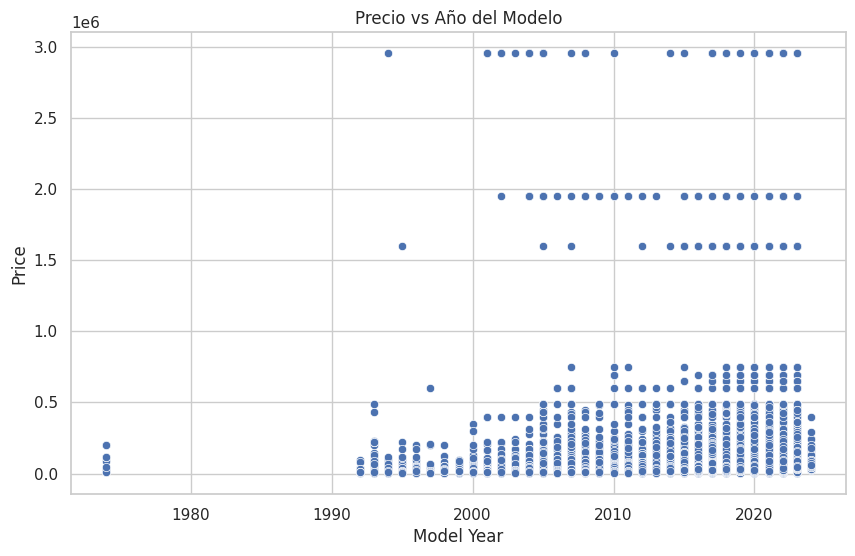

In [12]:
#3. Price vs model year scater
#Aqui comprobaremos la relación entre precio y año del modelo (model_year)
plt.figure(figsize=(10,6))
sns.scatterplot(x='model_year', y='price', data=train)
plt.title("Precio vs Año del Modelo")
plt.xlabel("Model Year")
plt.ylabel("Price")
plt.show()

In [14]:
#4. Categorical vs Price Boxplots
plt.figure(figsize=(12,6))
sns.boxplot(x='manufacturer', y='price', data=train)
plt.title("Precio por Fabricante")
plt.xticks(rotation=45)
plt.show()

ValueError: Could not interpret value `manufacturer` for `x`. An entry with this name does not appear in `data`.

<Figure size 1200x600 with 0 Axes>